## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

### Creating dummy variable

In [4]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the dataframe

In [5]:
X = pd.concat([X,geography,gender], axis=1)

### Drop unnescessary columns

In [6]:
X = X.drop(['Geography','Gender'],axis=1)

### Splitting the dataset into training and test data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### Let's make it ANN

### Import Keras library and packages

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [16]:
## Initializing the ANN
classifier = Sequential()

In [17]:
## Adding the input layer and first hidden layer
classifier.add(Dense(output_dim=6,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

C:\Users\vinay.nanjappa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=11, units=6)`
  


In [18]:
## Adding second hidden layer
classifier.add(Dense(output_dim=6, kernel_initializer='he_uniform',activation='relu'))

C:\Users\vinay.nanjappa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=6)`
  


In [19]:
## Adding the output layer
classifier.add(Dense(output_dim = 1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

C:\Users\vinay.nanjappa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="sigmoid", units=1)`
  


In [20]:
## Compiling the ANN
classifier.compile(optimizer='Adamax',loss='binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
## Fitting the ANN to training set
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, nb_epoch=100)

C:\Users\vinay.nanjappa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 492us/step - loss: 0.5729 - acc: 0.7916 - val_loss: 0.5073 - val_acc: 0.7955
Epoch 2/100
5359/5359 [==============================] - 2s 324us/step - loss: 0.4955 - acc: 0.7962 - val_loss: 0.4693 - val_acc: 0.7959
Epoch 3/100
5359/5359 [==============================] - 2s 283us/step - loss: 0.4627 - acc: 0.7977 - val_loss: 0.4534 - val_acc: 0.7955
Epoch 4/100
5359/5359 [==============================] - 2s 287us/step - loss: 0.4473 - acc: 0.8005 - val_loss: 0.4453 - val_acc: 0.7952
Epoch 5/100
5359/5359 [==============================] - 2s 308us/step - loss: 0.4392 - acc: 0.8015 - val_loss: 0.4409 - val_acc: 0.7948
Epoch 6/100
5359/5359 [==============================] - 2s 295us/step - loss: 0.4345 - acc: 0.8029 - val_loss: 0.4378 - val_acc: 0.7967
Epoch 7/100
5359/5359 [==============================] - 2s 292us/step - loss: 0.4307 - acc: 0.8071 - val_loss: 0.4355 - val_acc:

5359/5359 [==============================] - 2s 358us/step - loss: 0.3466 - acc: 0.8556 - val_loss: 0.3765 - val_acc: 0.8425
Epoch 68/100
5359/5359 [==============================] - 3s 521us/step - loss: 0.3453 - acc: 0.8548 - val_loss: 0.3764 - val_acc: 0.8406
Epoch 69/100
5359/5359 [==============================] - 4s 768us/step - loss: 0.3449 - acc: 0.8572 - val_loss: 0.3749 - val_acc: 0.8455
Epoch 70/100
5359/5359 [==============================] - 3s 516us/step - loss: 0.3440 - acc: 0.8546 - val_loss: 0.3742 - val_acc: 0.8451
Epoch 71/100
5359/5359 [==============================] - 3s 548us/step - loss: 0.3434 - acc: 0.8561 - val_loss: 0.3735 - val_acc: 0.8455
Epoch 72/100
5359/5359 [==============================] - 2s 368us/step - loss: 0.3426 - acc: 0.8561 - val_loss: 0.3735 - val_acc: 0.8436
Epoch 73/100
5359/5359 [==============================] - 2s 355us/step - loss: 0.3420 - acc: 0.8578 - val_loss: 0.3727 - val_acc: 0.8444
Epoch 74/100
5359/5359 [=======================

In [22]:
import matplotlib.pyplot as plt

In [25]:
# List all data in history

print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


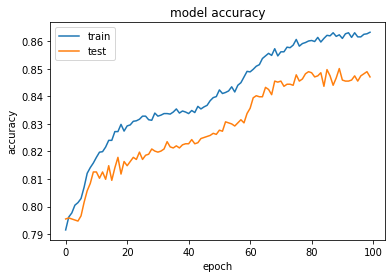

In [26]:
## Summarizing the history of accuracy

plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

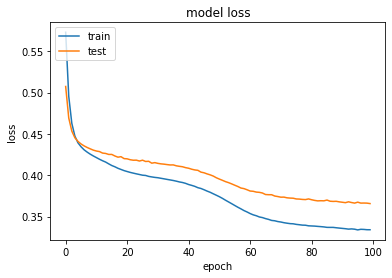

In [28]:
## Summarizing the history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Making the prediction and evaluating the model

In [30]:
## Predicting the test results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [33]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)